# **<center>Machine Learning and Finance </center>**


## <center> Programming Session 6 - Introduction to Sequence Models - </center>

<table class="tfo-notebook-buttons" align="center">
  <td>
    <a target="_blank" href="https://hm-ai.github.io/MLF/">
    <img src="https://drive.google.com/uc?export=view&id=1gmxxmwCR1WXK0IYtNqvE4QXFleznWqQO" height="50"/>
    Course page</a>
</td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/drive/1haHrgxfgY78EzGAjWkOejO12z_9wppfV?usp=sharing"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" height="50" />Run in Google Colab</a>
  </td>
</table>


The Objective of this session is to create a sequence model to predict the labels of the MNIST dataset

In [ ]:
# Access files from Google Drive
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# 1. Numpy implementation of a standard RNN

<center><img width=“700" src = "https://drive.google.com/uc?export=view&id=1vXVUvFIFDxYo_sdil2QPJWSCwXwZj27f"></center>

In [ ]:
# Import basic libraries
import matplotlib.pyplot as plt # for plotting 
import numpy as np # for manipulating arrays
import tensorflow as tf # for creating Neural Networks, we will use it to load data
plt.style.use('dark_background') # to adapt the colors to a dark background
from IPython.display import Image # for showing graphs from the lectures

We have the following hyperparameters:

In [ ]:
N = 1000 # number of samples 
T = 100 # sequence length
D = 50 # embedding dimension 
d = 20 # size of memory vectors

---
<font color=green>Q1:</font>
<br><font color='green'>
Generate some random data of shape (N, T, D).
</font>

---

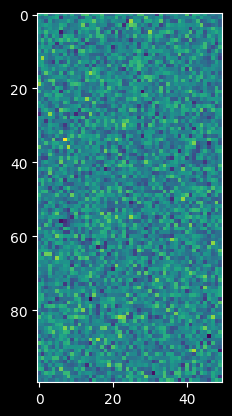

In [ ]:
X = np.random.randn(N, T, D)
plt.imshow(X[0])

---
<font color=green>Q2:</font>
<br><font color='green'>
Create some random weights $W_{hh}, W_{xh}, b_h$
</font>

---

In [ ]:
W_hh = np.random.random((d, d))
W_xh = np.random.random((D, d))
b_h = np.random.random((d,))

---
<font color=green>Q3:</font>
<br><font color='green'>
Generate the output tensor of shape (N, T, d) by creating the sequence $h_1, \dots, h_T$ associated with each sequence $x_1, \dots, x_T$. 
</font>

---

In [ ]:
# X (N, T, D) ---> H (N, T, d)
H = np.zeros((N, T, d))

for i in range(N):
  # Extract X_1, ..., X_T all of dimension D
  sequence_X = X[i]

  # Initialize an empty list of hidden vectors h_1, ..., h_T
  sequence_H = []

  # Initialize h_0 with zeros
  h_t_minus_one = np.zeros((d))

  # Calculate h_1, ..., h_T
  for t in range(T):
    # Use the update equation: 
    # h_t = tanh(W_xh^T x_t + W_hh^T h_t_minus_one + b_h)
    h_t = np.tanh(W_xh.T.dot(sequence_X[t]) + W_hh.T.dot(h_t_minus_one) + b_h)
    # Store the value of h_t in Sequence_H
    sequence_H.append(h_t)
    # Update h_t_minus_one
    h_t_minus_one = h_t 
  H[i] = np.asarray(sequence_H)



In [ ]:
H.shape # (N, T, d)

(1000, 100, 20)

---
<font color=green>Q4:</font>
<br><font color='green'>
Plot the shape of the output:
</font>

---

(1000, 100, 20)

# 2. MNIST Classification using LSTMs

<center><img width=“700" src = "https://drive.google.com/uc?export=view&id=1KNpBc60u1QCopXygOff0tLkQNkyXuSmr"></center>

We want to use the LSTM layer to classify the MNIST dataset.

The dataset is of shape (60000, 28, 28). 

Each sample is an image of shape (28, 28).

We can look at the image as a sequence of length T = 28, where each element is of dimension D = 28

## 2.1 Loading the MNIST dataset

---
<font color=green>Q5:</font>
<br><font color='green'>
Load the MNIST dataset using `tf.keras.datasets.mnist.load_data`
</font>

---

In [ ]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

---
<font color=green>Q6:</font>
<br><font color='green'>
Plot the shape of the data
</font>

---

(60000, 28, 28)

---
<font color=green>Q7:</font>
<br><font color='green'>
Scale the feature train and test data by dividing each pixel element by 255
</font>

---

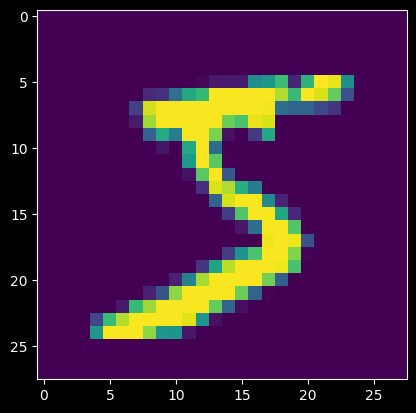

---
<font color=green>Q8:</font>
<br><font color='green'>
The targets are categories in $\{0, \dots, 9\}$. Create the tensor target of shape (N, 10) by one hot encoding the targets using `to_categorical` from `tensorflow.keras.utils`
</font>

---

---
<font color=green>Q9:</font>
<br><font color='green'>
Create the following model and train it using gradient descent
</font>

---

<center><img width=“500" src = "https://drive.google.com/uc?export=view&id=1zCyhgITfxptmBzUDQ7-TPKsKugVyjtat"></center>

In [ ]:
# Set hyperparameters


Epoch 1/10
188/188 [==============================] - 11s 41ms/step - loss: 1.4451 - acc: 0.5317 - val_loss: 0.6617 - val_acc: 0.8154
Epoch 2/10
188/188 [==============================] - 6s 30ms/step - loss: 0.5043 - acc: 0.8526 - val_loss: 0.3542 - val_acc: 0.8978
Epoch 3/10
188/188 [==============================] - 7s 39ms/step - loss: 0.3247 - acc: 0.9041 - val_loss: 0.2536 - val_acc: 0.9271
Epoch 4/10
188/188 [==============================] - 6s 30ms/step - loss: 0.2449 - acc: 0.9278 - val_loss: 0.2149 - val_acc: 0.9373
Epoch 5/10
188/188 [==============================] - 7s 37ms/step - loss: 0.2039 - acc: 0.9389 - val_loss: 0.1859 - val_acc: 0.9452
Epoch 6/10
188/188 [==============================] - 7s 38ms/step - loss: 0.1729 - acc: 0.9497 - val_loss: 0.1673 - val_acc: 0.9494
Epoch 7/10
188/188 [==============================] - 12s 64ms/step - loss: 0.1532 - acc: 0.9543 - val_loss: 0.1399 - val_acc: 0.9593
Epoch 8/10
188/188 [==============================] - 8s 43ms/step 

---
<font color=green>Q10:</font>
<br><font color='green'>
Plot the training and the validation loss and the training and the validation accuracy
</font>

---

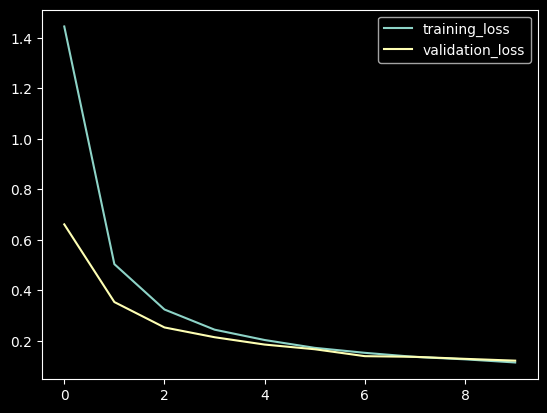

In [ ]:
# Plot the training loss and the validation loss 


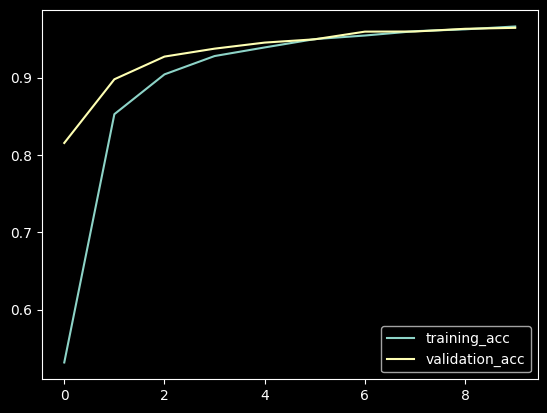

In [ ]:
# Plot the training accuracy and the validation accuracy 


# Wrap-up

In this programming session, we've learned:

* To code the RNN layer using numpy to understand how data is transformed.
* To perform a classification task on data of shape (N, T, D) using the LSTMs. 





### Contact

If you have any questions regarding this notebook, do not hesitate to contact: h.madmoun@imperial.ac.uk

